In [2]:
import json
import random

f = open(r"C:\Users\halit.erdogan\PycharmProjects\DeepFake Audio\FULL_spects_and_labels_db_mfcc.json")
dataraw = json.load(f)
random.shuffle(dataraw)

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sample = dataraw[5]
spec = np.asarray(sample["mel"])
spec

array([[-7.22728724e+02, -7.18498591e+02, -7.20210836e+02, ...,
        -6.47252351e+02, -6.54325733e+02, -6.61512743e+02],
       [-4.82897105e+00, -3.19603530e+00, -8.41703398e+00, ...,
         3.16204196e-01, -1.58317709e+00, -6.07381599e+00],
       [ 3.81184754e+00,  3.53124750e-01, -6.43680930e+00, ...,
        -5.03357545e+01, -4.87299600e+01, -4.09121954e+01],
       ...,
       [-7.88315831e+00, -4.69052363e+00, -1.18559030e+00, ...,
        -6.68900509e+00,  4.02944934e+00,  1.12902710e+00],
       [-1.73937562e+00, -4.71339923e+00, -1.44640826e+00, ...,
        -2.37100512e+00,  4.94800256e+00,  7.81669274e+00],
       [ 3.76736732e+00, -1.86359691e+00, -2.53884625e+00, ...,
        -1.81665155e+01, -1.31938996e+01, -7.04613290e+00]])

In [4]:
spec.shape

(20, 938)

In [5]:
spec_formula = (spec - spec.mean()) / spec.std() #Z-normalization
spec_formula

array([[-5.07715685, -5.04622487, -5.05874531, ..., -4.52525136,
        -4.57697402, -4.62952755],
       [ 0.17233777,  0.18427828,  0.1461008 , ...,  0.20996081,
         0.19607197,  0.1632351 ],
       [ 0.23552198,  0.21023078,  0.16058078, ..., -0.16042125,
        -0.1486792 , -0.0915134 ],
       ...,
       [ 0.15000465,  0.17335014,  0.19897924, ...,  0.15873665,
         0.23711315,  0.21590441],
       [ 0.1949298 ,  0.17318286,  0.19707207, ...,  0.19031114,
         0.24382988,  0.26480659],
       [ 0.23519673,  0.19402146,  0.18908384, ...,  0.07480971,
         0.11117095,  0.15612523]])

In [7]:
X = []
y = []
for sample in dataraw:
    specTemp = sample["mel"]
    labelTemp = sample["label"]
    specTemp = np.asarray(specTemp)
    X.append(specTemp)
    y.append(labelTemp)

In [8]:
X = np.asarray(X)

In [9]:
X = np.expand_dims(X,axis=-1)
X.shape

(830, 20, 938, 1)

In [10]:
l = []
for i in y:
    if i == 'FakeClips':
        i=0
        l.append(i)
    elif i == 'RealClips':
        i=1
        l.append(i)
    else:
        print("anan")

In [11]:
y = l

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import tensorflow as tf

In [14]:
inputs = tf.keras.Input(shape=(20,938,1))

In [15]:
x = tf.keras.layers.Conv2D(16,(2,2),activation = "relu")(inputs)

In [16]:
x = tf.keras.layers.MaxPooling2D(2,2)(x)

In [17]:
x = tf.keras.layers.Conv2D(32,(2,2),activation = "relu")(x)  
x = tf.keras.layers.MaxPooling2D(2,2)(x)

In [18]:
x = tf.keras.layers.Flatten()(x)

In [19]:
x = tf.keras.layers.Dense(32,activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)

In [20]:
output = tf.keras.layers.Dense(1,activation="sigmoid")(x)      #Adding the Hidden layer

In [21]:
model = tf.keras.Model(inputs=inputs, outputs=output)

In [22]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['acc'])

In [23]:
y_train = np.asarray(y_train)

In [24]:
history = model.fit(X_train,y_train,verbose=1,batch_size=4,epochs=100)

Epoch 1/100
166/166 [==============================] - 3s 17ms/step - loss: 7.1377 - acc: 0.5873
Epoch 2/100
166/166 [==============================] - 3s 17ms/step - loss: 0.5927 - acc: 0.6295
Epoch 3/100
166/166 [==============================] - 3s 17ms/step - loss: 0.5213 - acc: 0.6837
Epoch 4/100
166/166 [==============================] - 3s 17ms/step - loss: 0.4630 - acc: 0.7425
Epoch 5/100
166/166 [==============================] - 3s 17ms/step - loss: 0.4197 - acc: 0.7816
Epoch 6/100
166/166 [==============================] - 3s 17ms/step - loss: 0.4127 - acc: 0.7892
Epoch 7/100
166/166 [==============================] - 3s 17ms/step - loss: 0.4047 - acc: 0.7937
Epoch 8/100
166/166 [==============================] - 3s 17ms/step - loss: 0.3861 - acc: 0.7982
Epoch 9/100
166/166 [==============================] - 3s 17ms/step - loss: 0.3675 - acc: 0.8193
Epoch 10/100
166/166 [==============================] - 3s 18ms/step - loss: 0.3787 - acc: 0.8117
Epoch 11/100
166/166 [=======

166/166 [==============================] - 3s 17ms/step - loss: 0.0026 - acc: 1.0000
Epoch 85/100
166/166 [==============================] - 3s 17ms/step - loss: 0.0901 - acc: 0.9834
Epoch 86/100
166/166 [==============================] - 3s 17ms/step - loss: 0.0110 - acc: 0.9955
Epoch 87/100
166/166 [==============================] - 3s 17ms/step - loss: 0.0025 - acc: 1.0000
Epoch 88/100
166/166 [==============================] - 3s 17ms/step - loss: 6.6006e-04 - acc: 1.0000
Epoch 89/100
166/166 [==============================] - 3s 17ms/step - loss: 0.0040 - acc: 0.9970
Epoch 90/100
166/166 [==============================] - 3s 17ms/step - loss: 0.0037 - acc: 0.9985
Epoch 91/100
166/166 [==============================] - 3s 17ms/step - loss: 0.0107 - acc: 0.9985
Epoch 92/100
166/166 [==============================] - 3s 17ms/step - loss: 2.4711e-04 - acc: 1.0000
Epoch 93/100
166/166 [==============================] - 3s 17ms/step - loss: 2.3006e-04 - acc: 1.0000
Epoch 94/100
166/166 

In [25]:
y_test = np.asarray(y_test)
y_test.shape

(166,)

In [26]:
(eval_loss, eval_accuracy) = model.evaluate(X_test, y_test, batch_size=4, verbose=1)
print("accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("Loss: {}".format(eval_loss))

42/42 [==============================] - 0s 6ms/step - loss: 0.6007 - acc: 0.9819
accuracy: 98.19%
Loss: 0.6007348895072937


In [27]:
y_pred = np.round(model.predict(X_test),0)
import sklearn.metrics as metrics
classif_metrics = metrics.classification_report(y_test,y_pred,target_names = ['Fake','Real'])
print(classif_metrics)

              precision    recall  f1-score   support

        Fake       0.98      0.97      0.98        65
        Real       0.98      0.99      0.99       101

    accuracy                           0.98       166
   macro avg       0.98      0.98      0.98       166
weighted avg       0.98      0.98      0.98       166



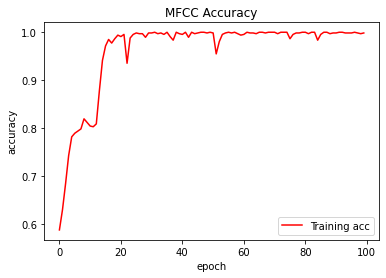

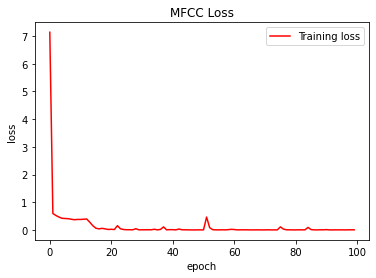

In [29]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
loss = history.history["loss"]
epochs = range(len(acc))
plt.plot(epochs, acc, "r", label="Training acc")
#plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("MFCC Accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
#plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("MFCC Loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()

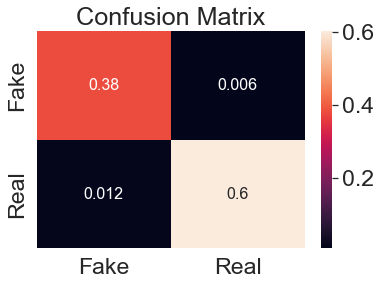

In [30]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


TP = 0
FP = 0
TN = 0
FN = 0

for i in range(0,len(y_pred)):
    if y_pred[i][0] == 1:
        if y_test[i] == 1:
            TN += 1
        if y_test[i] == 0:
            FN += 1
    if y_pred[i][0] == 0:
        if y_test[i] == 1:
            FP += 1
        if y_test[i] == 0:
            TP += 1

total = TN + FN + TP + FP
TN = TN / total
FN = FN / total
TP = TP / total
FP = FP / total


array = [[TP,FP],
         [FN,TN]]

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=2.1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.title("Confusion Matrix")
plt.xticks([0.5,1.5], ["Fake","Real"])
plt.yticks([0.5,1.5], ["Fake","Real"])

plt.show()